# Total crime

## Part 1: Data Preparing

### 1.1 Loading data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [6]:
df=pd.read_csv(r'crime2.csv')
df=df.drop(columns=['unemployment_rate','laumt', 'household_income'], axis=1)

In [7]:
display(df)
display(df.info())

,month_year,unempl_rate,month,equipment,expenses,salaries_benefits,median_hhincome,equipment_expenses,police_classified_expenses,vehicle_expenses,transportation_expenses,training_expenses,office_expenses,tech_expenses,total_expenditures,householdincome,population,total_crime
0,2011-12,11.5,12,68754.00,3166515.00,8.986384e+07,52239,777045.87,477393.53,316012.87,986593.93,2493.95,412057.99,465391.10,6.820457e+08,52584.00,9905970,16246.00
1,2012-01,11.9,1,27689.38,3869464.53,8.936533e+07,52929,777045.87,477393.53,316012.87,986593.93,2493.95,412057.99,465391.10,1.034241e+08,52641.50,9910880,17010.00
2,2012-02,11.6,2,107109.00,2762364.72,9.007370e+07,52929,432970.93,477393.53,316012.87,986593.93,6236.58,222237.23,66705.36,9.619063e+07,52699.00,9915790,15278.00
3,2012-03,11.2,3,17116.37,2867717.35,9.015249e+07,52929,424806.70,477393.53,20291.67,986593.93,20730.55,390175.50,44325.45,9.469714e+07,52756.50,9920690,16678.00
4,2012-04,10.5,4,95930.00,2223266.02,1.336938e+08,52929,286486.53,592685.60,59378.08,1800.00,13324.29,280853.86,439.00,1.369942e+08,52814.00,9925600,16261.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2019-10,4.3,10,165106.01,4701778.26,1.166936e+08,71060,320865.27,2084.29,316012.87,312649.73,22651.45,827555.71,109438.57,1.262587e+08,71711.40,10030000,18542.00
95,2019-11,4.1,11,335171.54,26266990.32,2.335700e+08,71060,1248931.54,29165.92,560197.70,2202090.38,22651.45,1862144.64,1023566.22,1.257695e+08,72083.94,10027100,17184.00
96,2019-12,4.0,12,379276.48,4574301.28,1.749720e+08,71060,330655.48,477393.53,316012.87,717671.66,22651.45,672592.19,200204.12,1.303049e+08,60572.24,10039272,17068.52
97,2020-01,4.5,1,82553.00,3828289.15,1.290656e+08,74134,583198.97,154.80,316012.87,299941.85,22651.45,177530.28,200204.12,1.303049e+08,60572.24,10039272,17068.52


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 18 columns):
month_year                    99 non-null object
unempl_rate                   99 non-null float64
month                         99 non-null int64
equipment                     99 non-null float64
expenses                      99 non-null float64
salaries_benefits             99 non-null float64
median_hhincome               99 non-null int64
equipment_expenses            99 non-null float64
police_classified_expenses    99 non-null float64
vehicle_expenses              99 non-null float64
transportation_expenses       99 non-null float64
training_expenses             99 non-null float64
office_expenses               99 non-null float64
tech_expenses                 99 non-null float64
total_expenditures            99 non-null float64
householdincome               99 non-null float64
population                    99 non-null int64
total_crime                   99 non-null float64
dtyp

None

Generally variable with highest correlation is a good predictor

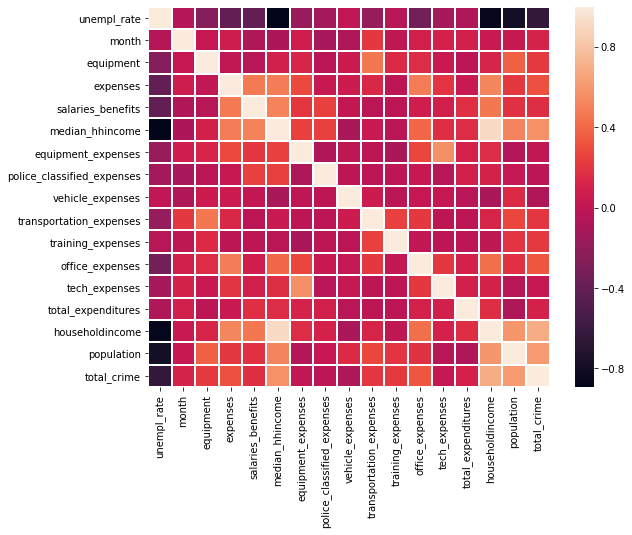

In [8]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(9,7))
a=sns.heatmap(corr,            
    linewidths=1.0)

### 1.2 Simple EDA

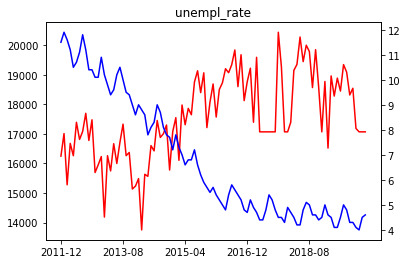

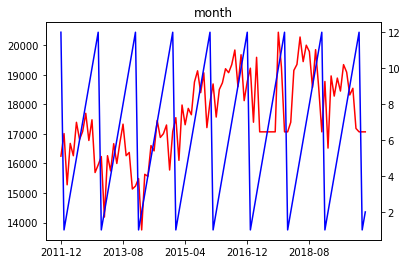

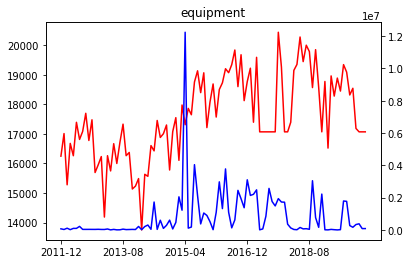

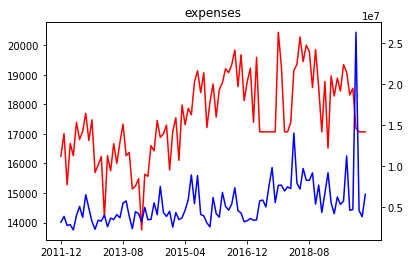

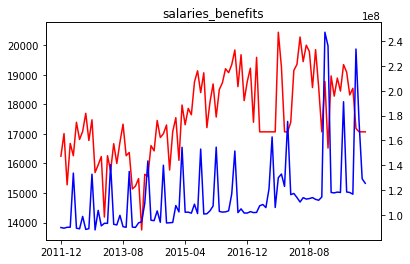

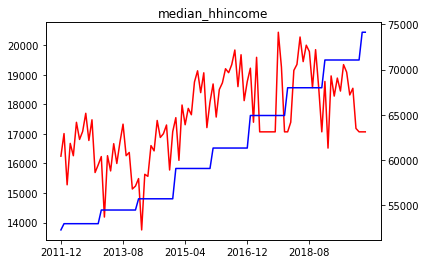

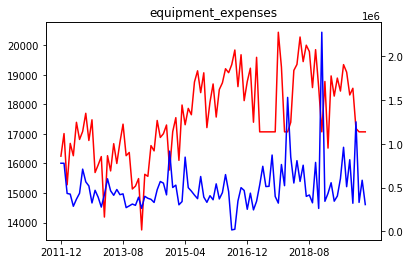

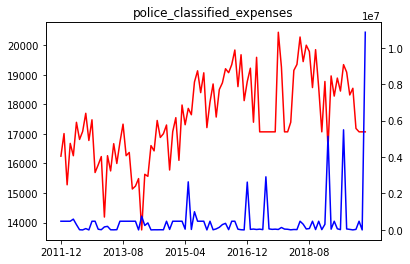

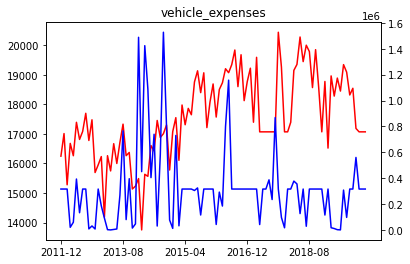

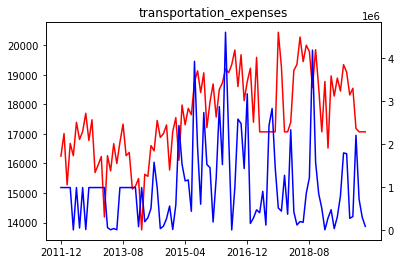

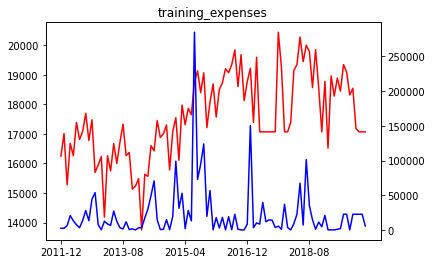

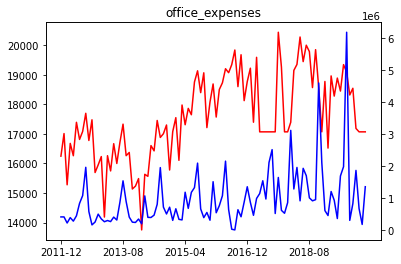

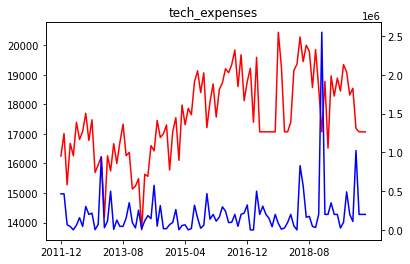

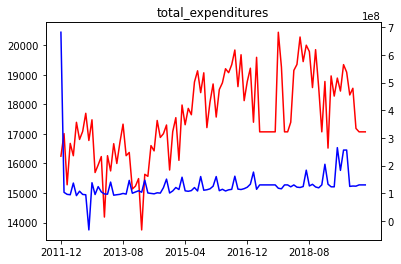

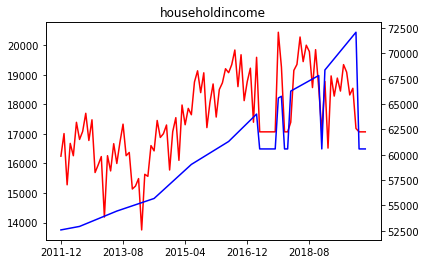

In [9]:
data=df.drop(columns=['month_year'])
m=df['month_year']
a=df['total_crime']
i=0
while i <15:
    fig, ax=plt.subplots()
    ax.plot(m, a, color="red")
   
    ax2=ax.twinx()
    ax2.set_xticks([0,20,40,60,80])
    ax2.set_title(data.columns[i])
    ax2.plot(m,data.iloc[:,i].values,color="blue")
    i=i+1    
    plt.show()


## Part 2: Model

In [11]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['month_year','total_crime'], axis=1)
y =df['total_crime']
X_train=X[:75]
X_test=X[76:]
y_train=y[:75]
y_test =y[76:]

In [12]:
features=X.columns

In [13]:
from sklearn.preprocessing import StandardScaler
#standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler = scaler.fit(X_train)
#for the training set
X_train = scaler.transform(X_train)
#for the test set
X_test = scaler.transform(X_test)

### 2.1 Model: linear regression

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
def results(y_test, y_pred):
    print('mse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('r2: ', r2_score(y_test, y_pred))

In [15]:
%%time
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
results(y_test, y_pred)
lr.score(X,y)

mse:  3227.197484913018
r2:  -8.256909432702665
Wall time: 89.8 ms


-41359164915998.055

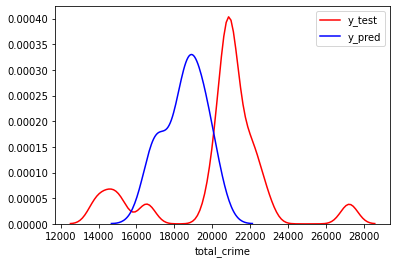

In [16]:
import seaborn as sns
ax1 = sns.distplot(y_pred, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

###  2.2.2 variable importance analysis

In [17]:
coe=lr.coef_

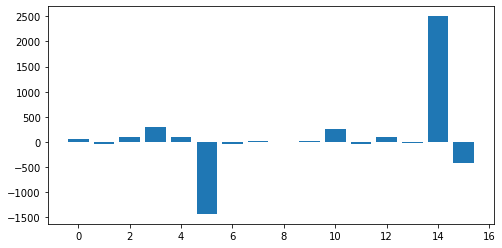

0: unempl_rate
1: month
2: equipment
3: expenses
4: salaries_benefits
5: median_hhincome
6: equipment_expenses
7: police_classified_expenses
8: vehicle_expenses
9: transportation_expenses
10: training_expenses
11: office_expenses
12: tech_expenses
13: total_expenditures
14: householdincome
15: population


In [18]:
plt.figure(figsize=(8,4))
ax=plt.bar([x for x in range(len(coe))], coe)
plt.show()
for i,j in enumerate(features):
    print('%d: %s'%(i,j))

In [19]:
#sorted importance of variables:
for i,j in sorted(list(zip(features, map(lambda x: round(x, 2), coe))), key=lambda x: x[1]):
    print('%s: %.3f' % (i,j))

median_hhincome: -1430.570
population: -425.360
month: -50.080
equipment_expenses: -46.020
office_expenses: -41.550
total_expenditures: -11.740
vehicle_expenses: 6.480
transportation_expenses: 16.430
police_classified_expenses: 17.270
unempl_rate: 57.750
tech_expenses: 92.720
equipment: 96.080
salaries_benefits: 105.990
training_expenses: 258.000
expenses: 295.540
householdincome: 2500.430


### Model 2.2: Cross Validation with Linear Regression

In [20]:
from sklearn.preprocessing import StandardScaler
#standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [21]:
from sklearn.model_selection import KFold

In [22]:
def run_cv(X, y, clf_class):
    score=0
    #construct a kfolds object
    kf=KFold(n_splits=8, shuffle=False)
    y_pred=y.copy()
    clf=clf_class()
    #Iterate through folds
    for train_index, test_index in kf.split(X):
        X_train, X_test=X[train_index], X[test_index]
        y_train, y_test =y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred[test_index]=clf.predict(X_test)
        score=clf.score(X,y)
    return score,y_pred

In [23]:
score, y_pred=run_cv(X,y,LinearRegression)

In [24]:
score

0.1754648951972595

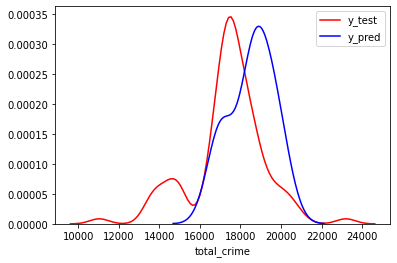

In [25]:
import seaborn as sns
ax1 = sns.distplot(y_pred, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

### Model 2.3 XGBoost

In [26]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [27]:
%%time
xg=XGBRegressor(n_estimators=10000)
xg.fit(X_train, y_train)
y_xg=xg.predict(X_test)
results(y_test, y_xg)
rmse = np.sqrt(mean_squared_error(y_test, y_xg))
print("RMSE: %f" % (rmse))


mse:  1390.9068872955738
r2:  -0.7195350993772036
RMSE: 1390.906887
Wall time: 5.26 s


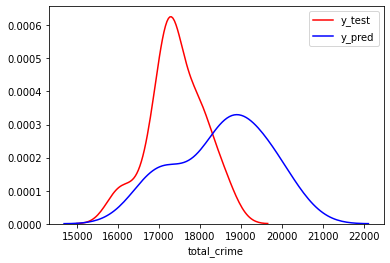

In [28]:
import seaborn as sns
ax1 = sns.distplot(y_xg, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

### Model 2.4: LSTM

In [31]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['month','month_year','total_crime'], axis=1)
y =df['total_crime']
X_train=X[:55].values
y_train=y[:55]
X_val=X[56:72].values
y_val=y[56:72]
X_test=X[73:].values
y_test=y[73:]

In [36]:
y_train=np.array(y_train).reshape(55,1)
y_test=np.array(y_test).reshape(26,1)
y_val=np.array(y_val).reshape(16,1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(55, 15) (55, 1) (26, 15) (26, 1) (16, 15) (16, 1)


In [37]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_val=X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))


In [38]:
from keras.models import Sequential
from keras.layers import *
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [39]:
# design network
# first CONV => RELU => CONV => RELU => POOL layer set
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization(axis=1))
model.add(Dense(1, activation='relu'))
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                13200     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 13,451
Trainable params: 13,351
Non-trainable params: 100
_________________________________________________________________


In [40]:
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_val, y_val), verbose=2, shuffle=False)

Epoch 1/50
11/11 - 1s - loss: 16914.2441 - val_loss: 18332.3203
Epoch 2/50
11/11 - 0s - loss: 16914.1504 - val_loss: 18332.3203
Epoch 3/50
11/11 - 0s - loss: 16914.0332 - val_loss: 18332.3203
Epoch 4/50
11/11 - 0s - loss: 16913.8984 - val_loss: 18332.3203
Epoch 5/50
11/11 - 0s - loss: 16913.7402 - val_loss: 18332.2988
Epoch 6/50
11/11 - 0s - loss: 16913.5645 - val_loss: 18332.1055
Epoch 7/50
11/11 - 0s - loss: 16913.3672 - val_loss: 18331.8887
Epoch 8/50
11/11 - 0s - loss: 16913.1445 - val_loss: 18331.6504
Epoch 9/50
11/11 - 0s - loss: 16912.8945 - val_loss: 18331.3828
Epoch 10/50
11/11 - 0s - loss: 16912.6211 - val_loss: 18331.0938
Epoch 11/50
11/11 - 0s - loss: 16912.3164 - val_loss: 18330.7715
Epoch 12/50
11/11 - 0s - loss: 16911.9824 - val_loss: 18330.4160
Epoch 13/50
11/11 - 0s - loss: 16911.6172 - val_loss: 18330.0352
Epoch 14/50
11/11 - 0s - loss: 16911.2207 - val_loss: 18329.6172
Epoch 15/50
11/11 - 0s - loss: 16910.7930 - val_loss: 18329.1680
Epoch 16/50
11/11 - 0s - loss: 169

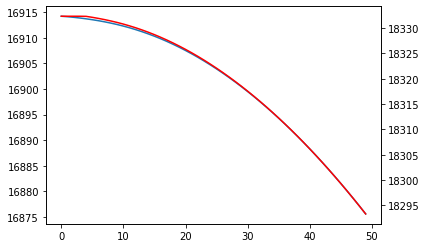

In [41]:
fig,ax = plt.subplots()
ax.plot(history.history['loss'], label='train')
ax2=ax.twinx()
ax2.plot(history.history['val_loss'],'r-',label='loss')
plt.show()

In [42]:
# make a prediction
yhat = model.predict(X_test)
yhat.shape

(26, 1)

In [43]:
X_test=X_test.reshape((X_test.shape[0],X_test.shape[2]))

In [44]:
print(y_test.shape, yhat.shape)

(26, 1) (26, 1)


In [45]:
np.mean(X_test-yhat)

20684114.407527976

In [46]:
results(np.max(yhat, axis=1),y_test)

mse:  18456.091185301426
r2:  -37167628.02464406


### 2.5: PCA

In [51]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['month','month_year','total_crime'], axis=1)
y =df['total_crime']
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(X)
p = pd.DataFrame(data = principalComponents
             , columns = ['pc'+str(i) for i in range(1, 15)])
score, y_pred=run_cv(p.values,y,LinearRegression)
score

0.24923676039514853

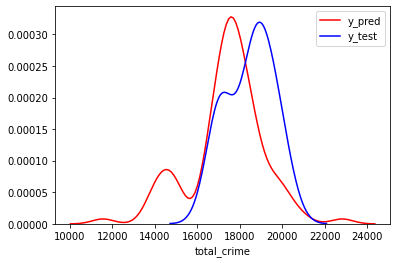

In [52]:
ax1=sns.distplot(y_pred, hist=False, color='r', label='y_pred')
sns.distplot(y_test, hist=False, color='b', label='y_test', ax=ax1)

# Area

In [95]:
df=pd.read_csv(r'C:\Users\Rachel\Desktop\ML\final\crime_total.csv')

In [96]:
df=df.drop(columns=['weapon','time', 'lat', 'lon', 'month_year', 'crime_rate'], axis=1)

In [97]:
display(df.head())
display(df.info())

,time_class,area,district_number,part,crime_code,age,sex,descent,premis,status,total_crime,total_expenditures,unemployment_rate,householdincome,population
0,morning,Mission,1902,1,420,60,M,W,garage/carport,IC,16246,6.820457e+08,11.5,52584.0,9905.97
1,evening,Rampart,217,2,745,36,M,H,"vehicle, passenger/truck",IC,16246,6.820457e+08,11.5,52584.0,9905.97
2,early_morning,Van Nuys,926,1,220,24,M,W,street,AA,16246,6.820457e+08,11.5,52584.0,9905.97
3,evening,Northeast,1133,1,420,20,M,W,parking lot,IC,16246,6.820457e+08,11.5,52584.0,9905.97
4,early_morning,Pacific,1402,1,330,24,F,O,alley,IC,16246,6.820457e+08,11.5,52584.0,9905.97


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268286 entries, 0 to 1268285
Data columns (total 15 columns):
time_class            1268286 non-null object
area                  1268286 non-null object
district_number       1268286 non-null int64
part                  1268286 non-null int64
crime_code            1268286 non-null int64
age                   1268286 non-null int64
sex                   1268286 non-null object
descent               1268286 non-null object
premis                1268286 non-null object
status                1268286 non-null object
total_crime           1268286 non-null int64
total_expenditures    1268286 non-null float64
unemployment_rate     1268286 non-null float64
householdincome       1268286 non-null float64
population            1268286 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 145.1+ MB


None

### 1.1 label encoding

In [98]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['area'], axis=1)
y =df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [99]:
df['time_class']=df['time_class'].map({'early_morning':0,'morning':1, 'afternoon':2, 'evening':3})

In [100]:
data=df[['area','sex','premis','descent', 'status']]
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
df[['area','sex','premis','descent',  'status']]=data.apply(LabelEncoder().fit_transform)

In [101]:
df.isnull().sum()

time_class            0
area                  0
district_number       0
part                  0
crime_code            0
age                   0
sex                   0
descent               0
premis                0
status                0
total_crime           0
total_expenditures    0
unemployment_rate     0
householdincome       0
population            0
dtype: int64

### 1.2 normalization

In [102]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['area'], axis=1)
y =df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('X_train: ', X_train.shape, '\nX_test:', X_test.shape)

X_train:  (1014628, 14) 
X_test: (253658, 14)


In [103]:
from sklearn.preprocessing import StandardScaler
#standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler = scaler.fit(X_train)
#for the training set
X_train = scaler.transform(X_train)
#for the test set
X_test = scaler.transform(X_test)

In [104]:
np.isnan(X_train).sum()

0

### Part 2: Modeling

#### 2.1 Logistic Regression

In [181]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def results(y_test, y_pred):
    print('MSE', mean_squared_error(y_test, y_pred))
    print('accuracy=',accuracy_score(y_test, y_pred))
    print('classification:\n', classification_report(y_test, y_pred))

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
%%time
lg=LogisticRegression()
lg.fit(X_train, y_train)
y_pred=lg.predict(X_test)

Wall time: 2min 47s


C:\Users\Rachel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [184]:
results(y_test.values, y_pred)

MSE 3.416434727073461
accuracy= 0.9435223805281127
classification:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     17804
           1       0.98      0.99      0.99     13244
           2       0.91      0.79      0.84     11123
           3       0.93      0.91      0.92      9339
           4       0.94      0.96      0.95     10189
           5       0.97      0.72      0.82      8448
           6       0.96      1.00      0.98     11680
           7       0.96      0.98      0.97     11966
           8       0.94      0.96      0.95     13570
           9       0.94      0.95      0.94     11028
          10       0.93      0.94      0.94     11246
          11       0.98      0.95      0.96     11275
          12       0.96      0.92      0.94     12718
          13       0.99      0.94      0.97     11231
          14       0.86      0.95      0.90     13640
          15       0.89      0.99      0.94     17464
          16 

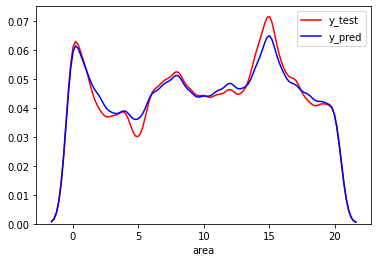

In [185]:
import seaborn as sns
ax1 = sns.distplot(y_pred, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

### 2.2 RandomForest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred=RF.predict(X_test)

In [ ]:
results(y_test, y_pred)

### 2.3 KNN

In [186]:
from sklearn.neighbors import KNeighborsClassifier

In [187]:
%%time
KNN= KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred=KNN.predict(X_test)

Wall time: 8min 29s


In [188]:
results(y_test, y_pred)

MSE 41.39464554636558
accuracy= 0.4311237966080313
classification:
               precision    recall  f1-score   support

           0       0.46      0.73      0.57     17804
           1       0.54      0.62      0.58     13244
           2       0.36      0.47      0.40     11123
           3       0.33      0.31      0.32      9339
           4       0.31      0.37      0.34     10189
           5       0.34      0.39      0.37      8448
           6       0.38      0.43      0.40     11680
           7       0.37      0.45      0.41     11966
           8       0.40      0.39      0.39     13570
           9       0.41      0.35      0.37     11028
          10       0.40      0.35      0.37     11246
          11       0.44      0.38      0.41     11275
          12       0.50      0.38      0.43     12718
          13       0.41      0.34      0.37     11231
          14       0.56      0.55      0.56     13640
          15       0.54      0.52      0.53     17464
          16 

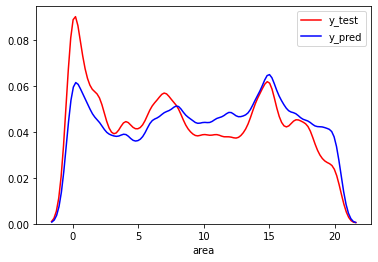

In [189]:
import seaborn as sns
ax1 = sns.distplot(y_pred, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)